# Explorately Data Anlaysis(EDA)

# 1) Introduction
 

###  1.1) Problem Statement

The challenge is to segment customers based on purchasing behaviors, demographics, and interactions to enhance marketing strategies. Without detailed segmentation, marketing efforts may be inefficient and fail to target relevant customer groups effectively.

### 1.2) Objective

The goal is to perform exploratory data analysis (EDA) to:

* Explore and summarize the dataset to identify patterns and distributions.
* Determine key attributes that define customer behavior and demographics.
* Visualize data to uncover potential customer segments.







# 2) Description

## 2.1) Source

The dataset for this project is provided by Dr. Omar Romero-Hernandez and can be accessed from 
 <a href="https://www.kaggle.com">Kaggle</a>

## 2.2) Description

This dataset contains information about customers demographics, purchase history, and other attributes.

### Dataset Columns:
- **ID**: Customer's unique identifier
- **Year_Birth**: Customer's birth year
- **Education**: Customer's education level
- **Marital_Status**: Customer's marital status
- **Income**: Customer's yearly household income
- **Kidhome**: Number of children in customer's household
- **Teenhome**: Number of teenagers in customer's household
- **Dt_Customer**: Date of customer's enrollment with the company
- **Recency**: Number of days since customer's last purchase
- **MntWines**: Amount spent on wine in last 2 years
- **MntFruits**: Amount spent on fruits in last 2 years
- **MntMeatProducts**: Amount spent on meat in last 2 years
- **MntFishProducts**: Amount spent on fish in last 2 years
- **MntSweetProducts**: Amount spent on sweets in last 2 years
- **MntGoldProds**: Amount spent on gold in last 2 years
- **NumDealsPurchases**: Number of purchases made with a discount
- **NumWebPurchases**: Number of purchases made through the company’s website
- **NumCatalogPurchases**: Number of purchases made using a catalogue
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebVisitsMonth**: Number of visits to company’s website in the last month
- **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **Complain**: 1 if customer complained in the last 2 years
- **Z_CostContact**: Cost to contact customer
- **Z_Revenue**: Revenue from customer
- **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

In [95]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
import warnings
import gdown
import os

In [96]:
# Download the file
file_id = '1ISks6Om7arMYBoukEvewVEwGrvhGvxTv'
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'
gdown.download(download_link, 'marketing.csv', quiet=False)
# Read the file
customer_df = pd.read_csv('marketing.csv')


Downloading...
From: https://drive.google.com/uc?export=download&id=1ISks6Om7arMYBoukEvewVEwGrvhGvxTv
To: C:\Users\laksh\marketing.csv
100%|███████████████████████████████████████████████████████████████████████████████| 220k/220k [00:00<00:00, 1.03MB/s]


In [97]:
customer_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# 3) Data Preprocessing

In [98]:
# handling missing values
missing_values_count = customer_df.isnull().sum()
print("Total no. of missing values in each column \n", missing_values_count)

Total no. of missing values in each column 
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


### 3.1) Handling Missing Values in 'Income' Column ( mean imputation)

In [99]:
mean_income = customer_df['Income'].mean()
print(mean_income)

# Filling missing values in the Income column with the mean value
customer_df['Income'] = customer_df['Income'].fillna(mean_income)

print(customer_df.head())

52247.25135379061
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain 

### 3.2) Outliers

* We check for outliers using IQR method

In [100]:
# List of numerical columns to check for outliers
numerical_columns = [
    'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth', 'Recency',
    'Z_CostContact', 'Z_Revenue'
]

# Function to detect outliers using IQR
def detect_outliers_iqr(customer_df, columns):
    outliers = {}
    for col in columns:
        if customer_df[col].dtype in ['float64', 'int64']:  # Ensure the column is numeric
            Q1 = customer_df[col].quantile(0.25)
            Q3 = customer_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identify outliers
            outlier_indices = customer_df[(customer_df[col] < lower_bound) | (customer_df[col] > upper_bound)].index
            if len(outlier_indices) > 0:
                outliers[col] = len(outlier_indices)
    
    return outliers

# Detect outliers in the specified columns
outlier_summary = detect_outliers_iqr(customer_df, numerical_columns)

# Print the summary of outliers
if outlier_summary:
    print("Outliers detected in the following columns:")
    for col, count in outlier_summary.items():
        print(f"Column: {col}, Number of Outliers: {count}")
else:
    print("No outliers detected.")


Outliers detected in the following columns:
Column: Income, Number of Outliers: 8
Column: MntWines, Number of Outliers: 35
Column: MntFruits, Number of Outliers: 227
Column: MntMeatProducts, Number of Outliers: 175
Column: MntFishProducts, Number of Outliers: 223
Column: MntSweetProducts, Number of Outliers: 248
Column: MntGoldProds, Number of Outliers: 207
Column: NumDealsPurchases, Number of Outliers: 86
Column: NumWebPurchases, Number of Outliers: 4
Column: NumCatalogPurchases, Number of Outliers: 23
Column: NumWebVisitsMonth, Number of Outliers: 8


* We find that there exists outliers in most of the columns, so our main focus is to remove the outliers from income.While removing outliers from the Income column might be necessary to get a clearer picture of typical income levels, other columns with outliers represent valid consumer behavior.

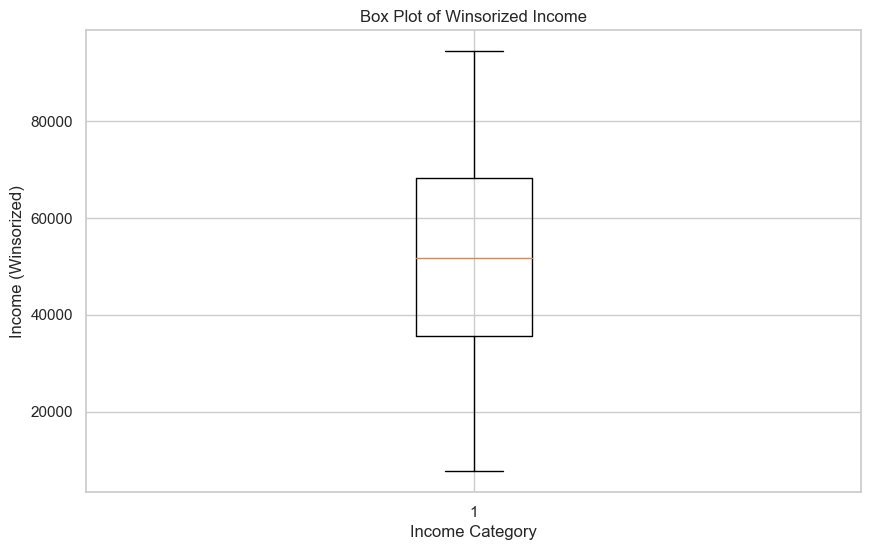

In [101]:
# Define the winsorize function
def winsorize(data, limits):
    return np.clip(data, *np.percentile(data, limits))

# Apply winsorization to the 'Income' column
customer_df['Income_winsorized'] = winsorize(customer_df['Income'], [1, 99])

# Create a box plot for the winsorized income
plt.figure(figsize=(10, 6))
plt.boxplot(customer_df['Income_winsorized'])

# Set the title and labels
plt.title('Box Plot of Winsorized Income')
plt.xlabel('Income Category')  # X-axis label
plt.ylabel('Income (Winsorized)')  # Y-axis label

# Show the plot
plt.show()

In [102]:
customer_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_winsorized
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,58138.0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,46344.0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,71613.0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,26646.0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,58293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,61223.0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,64014.0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,56981.0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,69245.0


### 3.2) Check for Missing Values

In [103]:
missing_values = customer_df.isnull().sum()

print(missing_values)

missing_columns = missing_values[missing_values > 0]
print("\nColumns with missing values:")
print(missing_columns)


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Income_winsorized      0
dtype: int64

Columns with missing values:
Series([], dtype: int64)


* There are no Missing Values

### 3.3) Feature Engineering

#### 3.31) Age Calculation

In [104]:
customer_df['Age'] = 2024 - customer_df['Year_Birth']
customer_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_winsorized,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,58138.0,67
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,46344.0,70
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,71613.0,59
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,26646.0,40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,58293.0,43


#### 3.32) Customer Tenure

In [105]:
customer_df['Dt_Customer'] = pd.to_datetime(customer_df['Dt_Customer'], dayfirst=True)
customer_df['Customer_Tenure'] = (pd.to_datetime('07-24-2024') - customer_df['Dt_Customer']).dt.days
customer_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_winsorized,Age,Customer_Tenure
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,58138.0,67,4341
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,46344.0,70,3791
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,71613.0,59,3990
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,26646.0,40,3817
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,58293.0,43,3839


#### 3.33) Total Children


In [106]:
customer_df['Total_Children'] = customer_df['Kidhome'] + customer_df['Teenhome']
customer_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_winsorized,Age,Customer_Tenure,Total_Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,58138.0,67,4341,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,46344.0,70,3791,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,71613.0,59,3990,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,26646.0,40,3817,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,58293.0,43,3839,1


#### 3.34) Total Spent

In [107]:
#Total Amount Spent
customer_df['Total_Spent'] = customer_df['MntWines'] + customer_df['MntFruits'] + customer_df['MntMeatProducts'] + customer_df['MntFishProducts'] + customer_df['MntSweetProducts'] + customer_df['MntGoldProds']

print(customer_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Spent']].head())


   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  Total_Spent  
0            88         1617  
1             6           27  
2            42          776  
3             5           53  
4            15          422  


#### 3.35) Income Spent Percentage

In [108]:
customer_df['Income_winsorized'] = customer_df['Income_winsorized']
customer_df['Income_Spent_Percentage'] = (customer_df['Total_Spent'] / customer_df['Income_winsorized']) * 100

print(customer_df[['Income_winsorized', 'Total_Spent', 'Income_Spent_Percentage']].head())


   Income_winsorized  Total_Spent  Income_Spent_Percentage
0            58138.0         1617                 2.781313
1            46344.0           27                 0.058260
2            71613.0          776                 1.083602
3            26646.0           53                 0.198904
4            58293.0          422                 0.723929


#### 3.36) Loyalty Score

In [109]:
# Feature 1: Loyalty_Score
customer_df['Loyalty_Score'] = (customer_df['Customer_Tenure'] * 0.5) + (customer_df['Recency'] * -0.3) + (customer_df['Total_Spent'] * 0.2)
customer_df['Loyalty_Score'] = (customer_df['Loyalty_Score'] - customer_df['Loyalty_Score'].min()) / (customer_df['Loyalty_Score'].max() - customer_df['Loyalty_Score'].min())
min_loyalty_score = customer_df['Loyalty_Score'].min()
max_loyalty_score = customer_df['Loyalty_Score'].max()
customer_df['Loyalty_Score'] = (customer_df['Loyalty_Score'] - min_loyalty_score) / (max_loyalty_score - min_loyalty_score)

print(customer_df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Z_CostContact  Z_Revenue  \
0            0  2012-09-04       58       635  ...     

#### 3.36) Customer Life Value

In [110]:
customer_df['CLV'] = customer_df['Total_Spent'] * customer_df['Customer_Tenure']
customer_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Income_winsorized,Age,Customer_Tenure,Total_Children,Total_Spent,Income_Spent_Percentage,Loyalty_Score,CLV
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,11,1,58138.0,67,4341,0,1617,2.781313,0.819668,7019397
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,11,0,46344.0,70,3791,2,27,0.058260,0.092643,102357
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,71613.0,59,3990,0,776,1.083602,0.405871,3096240
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,11,0,26646.0,40,3817,1,53,0.198904,0.119643,202301
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,11,0,58293.0,43,3839,1,422,0.723929,0.199405,1620058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,11,0,61223.0,57,4059,1,1341,2.190353,0.581125,5443119
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,11,0,64014.0,78,3697,3,444,0.693598,0.131038,1641468
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,11,0,56981.0,43,3833,0,1241,2.177919,0.399678,4756753
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,11,0,69245.0,68,3834,1,843,1.217416,0.332549,3232062


#### 3.36) Spending Categories

In [111]:
customer_df['Luxury_Spending'] = customer_df['MntWines'] + customer_df['MntGoldProds']
customer_df['Necessity_Spending'] = customer_df['MntMeatProducts'] + customer_df['MntFruits'] + customer_df['MntFishProducts']
customer_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Income_winsorized,Age,Customer_Tenure,Total_Children,Total_Spent,Income_Spent_Percentage,Loyalty_Score,CLV,Luxury_Spending,Necessity_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,58138.0,67,4341,0,1617,2.781313,0.819668,7019397,723,806
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,46344.0,70,3791,2,27,0.058260,0.092643,102357,17,9
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,71613.0,59,3990,0,776,1.083602,0.405871,3096240,468,287
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,26646.0,40,3817,1,53,0.198904,0.119643,202301,16,34
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,58293.0,43,3839,1,422,0.723929,0.199405,1620058,188,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,61223.0,57,4059,1,1341,2.190353,0.581125,5443119,956,267
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,64014.0,78,3697,3,444,0.693598,0.131038,1641468,414,30
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,56981.0,43,3833,0,1241,2.177919,0.399678,4756753,932,297
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,69245.0,68,3834,1,843,1.217416,0.332549,3232062,489,324


#### 3.37) Customer Segmentation

In [112]:
customer_df['Segment'] = pd.qcut(customer_df['Total_Spent'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
customer_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Age,Customer_Tenure,Total_Children,Total_Spent,Income_Spent_Percentage,Loyalty_Score,CLV,Luxury_Spending,Necessity_Spending,Segment
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,67,4341,0,1617,2.781313,0.819668,7019397,723,806,Very High
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,70,3791,2,27,0.058260,0.092643,102357,17,9,Low
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,59,3990,0,776,1.083602,0.405871,3096240,468,287,High
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,40,3817,1,53,0.198904,0.119643,202301,16,34,Low
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,43,3839,1,422,0.723929,0.199405,1620058,188,207,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,57,4059,1,1341,2.190353,0.581125,5443119,956,267,Very High
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,78,3697,3,444,0.693598,0.131038,1641468,414,30,High
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,43,3833,0,1241,2.177919,0.399678,4756753,932,297,Very High
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,68,3834,1,843,1.217416,0.332549,3232062,489,324,High


#### 3.38) Campaign Engagement

In [113]:
customer_df['Campaign_Engagement'] = (customer_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1))
customer_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Customer_Tenure,Total_Children,Total_Spent,Income_Spent_Percentage,Loyalty_Score,CLV,Luxury_Spending,Necessity_Spending,Segment,Campaign_Engagement
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4341,0,1617,2.781313,0.819668,7019397,723,806,Very High,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3791,2,27,0.058260,0.092643,102357,17,9,Low,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3990,0,776,1.083602,0.405871,3096240,468,287,High,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3817,1,53,0.198904,0.119643,202301,16,34,Low,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3839,1,422,0.723929,0.199405,1620058,188,207,High,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,4059,1,1341,2.190353,0.581125,5443119,956,267,Very High,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,3697,3,444,0.693598,0.131038,1641468,414,30,High,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3833,0,1241,2.177919,0.399678,4756753,932,297,Very High,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3834,1,843,1.217416,0.332549,3232062,489,324,High,0


# 4) Explorately Data Analysis (EDA)

## 4.1) Univariate Analysis

### 4.11) Descriptive Statistics


In [114]:
customer_df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2240.0,52247.251354,1730.0,35538.75,51741.5,68289.75,666666.0,25037.797168
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


### 4.12) Visualizations

#### 1)To find top 50 spenders by their Id's

         ID  Total_Spent
1572   5350         2525
1179   5735         2525
1492   1763         2524
987    4580         2486
1052   4475         2440
1601   5453         2352
1458  10133         2349
1288   9010         2346
943    5386         2302
1301   6024         2302
1444   1553         2283
1259   2147         2279
1869   2186         2257
644    1173         2252
1749    737         2231
1992   6248         2217
1982   3334         2211
77     7503         2209
1010   5236         2194
1710    477         2157
360    7274         2153
1280   3698         2130
248    8867         2126
1890   2747         2126
424    6932         2119
1075   6421         2116
884    5830         2114
686    9826         2114
1953   7919         2092
490    3403         2092
1672   3690         2091
515     203         2089
240     313         2088
1084   6072         2087
591    7627         2086
140     821         2077
681    4910         2074
1891   3010         2069
456    4947         2059


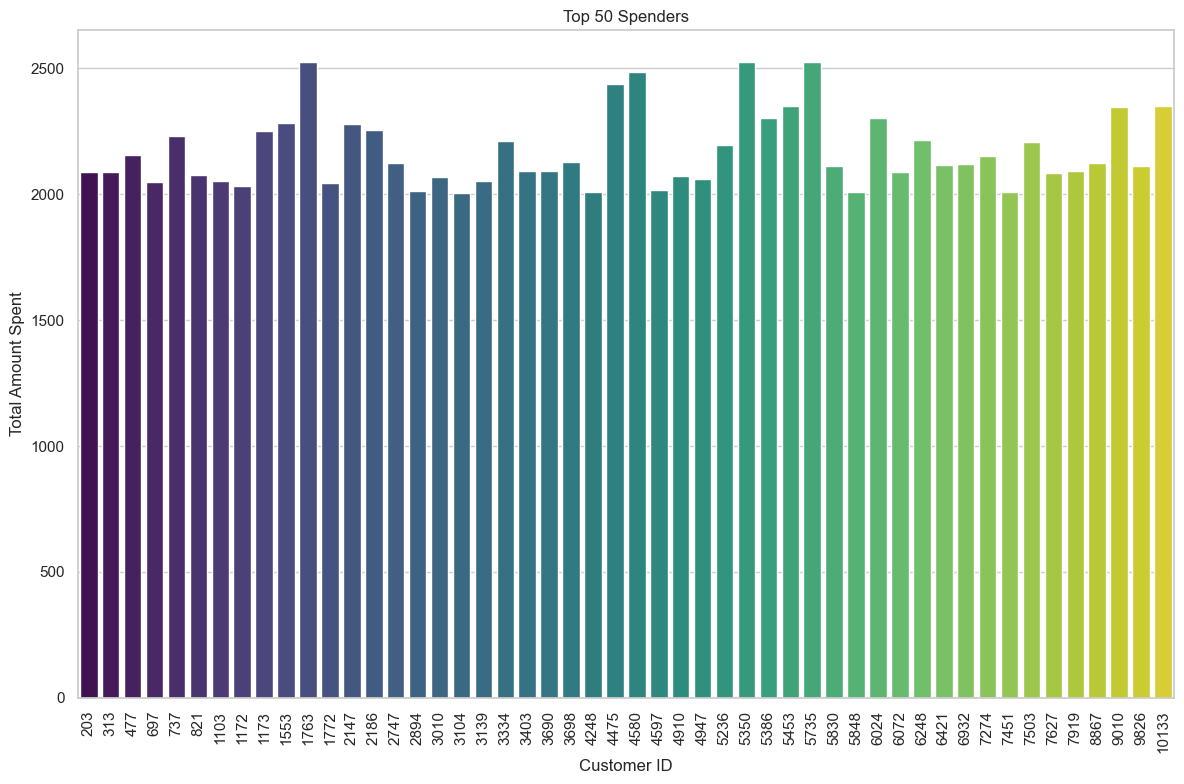

In [115]:
top_spenders = customer_df[['ID', 'Total_Spent']].sort_values(by='Total_Spent', ascending=False).head(50)

print(top_spenders)

# Create a bar plot for the top 50 spenders
plt.figure(figsize=(12, 8))
sns.barplot(x='ID', y='Total_Spent', data=top_spenders, palette='viridis')
plt.title('Top 50 Spenders')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=90) 
plt.tight_layout()

#### 2) Analysis of Customer Age Distribution

C:\Users\laksh\AppData\Local\Temp\ipykernel_14640\880443527.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(customer_df['Age'], shade=True, color='blue')


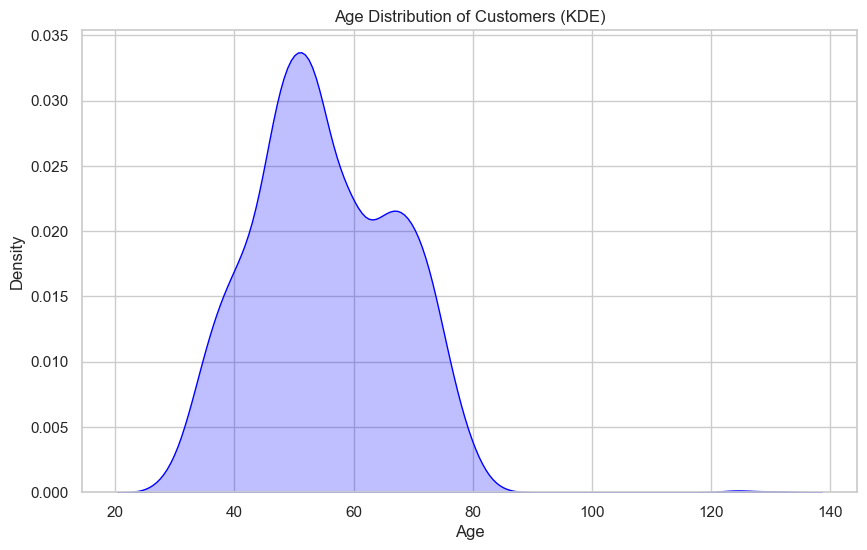

In [116]:
# Plotting KDE for Age distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(customer_df['Age'], shade=True, color='blue')
plt.title('Age Distribution of Customers (KDE)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [117]:
customer_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Customer_Tenure,Total_Children,Total_Spent,Income_Spent_Percentage,Loyalty_Score,CLV,Luxury_Spending,Necessity_Spending,Segment,Campaign_Engagement
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4341,0,1617,2.781313,0.819668,7019397,723,806,Very High,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3791,2,27,0.058260,0.092643,102357,17,9,Low,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3990,0,776,1.083602,0.405871,3096240,468,287,High,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3817,1,53,0.198904,0.119643,202301,16,34,Low,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3839,1,422,0.723929,0.199405,1620058,188,207,High,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,4059,1,1341,2.190353,0.581125,5443119,956,267,Very High,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,3697,3,444,0.693598,0.131038,1641468,414,30,High,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3833,0,1241,2.177919,0.399678,4756753,932,297,Very High,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3834,1,843,1.217416,0.332549,3232062,489,324,High,0


#### 3)To find the count of Living With.

* Marital Status: There are 7 unique values, the distribution of marital status categories may pose an sampling challenge. To address this, I will create a new column called Living_with and group the status into Alone and Partner, and drop the marital_status.

In [118]:
customer_df["Living_with"] =customer_df.Marital_Status.replace(
    {
        "Married": "Partner",
        "Together": "Partner",
        "Absurd": "Alone",
        "Widow": "Alone",
        "YOLO": "Alone",
        "Divorced": "Alone",
        "Single": "Alone",
    }
)

Living With Counts:
Living_with
Partner    1444
Alone       796
Name: count, dtype: int64
Mode of Living With Status: Partner


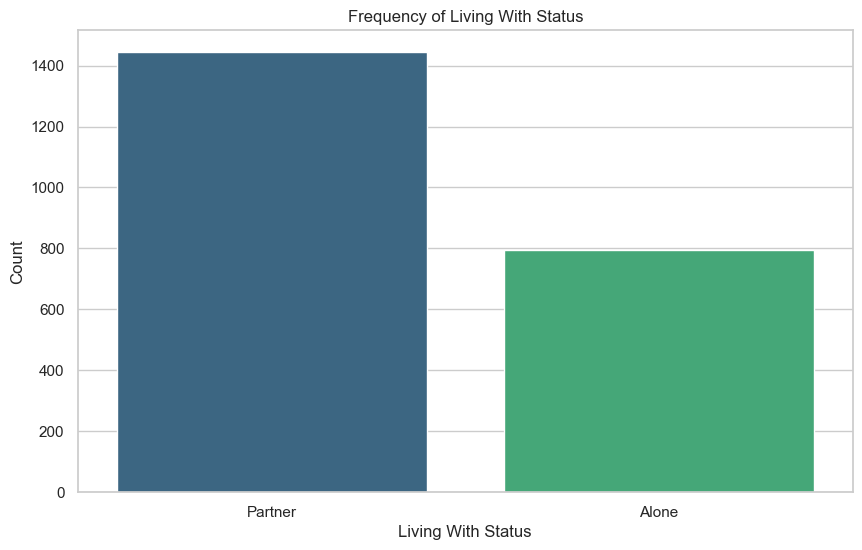

In [119]:
living_with_status_counts = customer_df['Living_with'].value_counts()
living_with_mode = customer_df['Living_with'].mode()[0]
print('Living With Counts:')
print(living_with_status_counts)
print(f'Mode of Living With Status: {living_with_mode}')

plt.figure(figsize=(10, 6))
sns.barplot(x=living_with_status_counts.index, y=living_with_status_counts.values, palette='viridis')
plt.title('Frequency of Living With Status')
plt.xlabel('Living With Status')
plt.ylabel('Count')
plt.show()

#### 4)To find the distribution of Customer Lifetime Value(CLV)

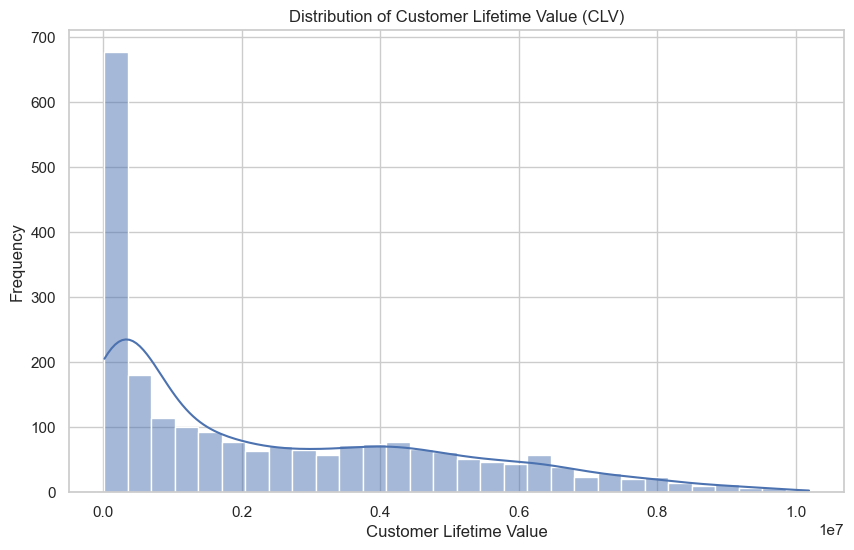

In [120]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_df['CLV'], bins=30, kde=True)
plt.title('Distribution of Customer Lifetime Value (CLV)')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.show()

* **Lower CLV for Majority Customers**: The graph is rightly skewed which suggest that most customers have relatively low CLV
* **High CLV Tail**: A smaller subset of customers has a very high CLV, which might represent loyal customers who have been with the company for a long time and/or make high-value purchases.

#### 4)To find the distribution of Luxury Spending among Customers

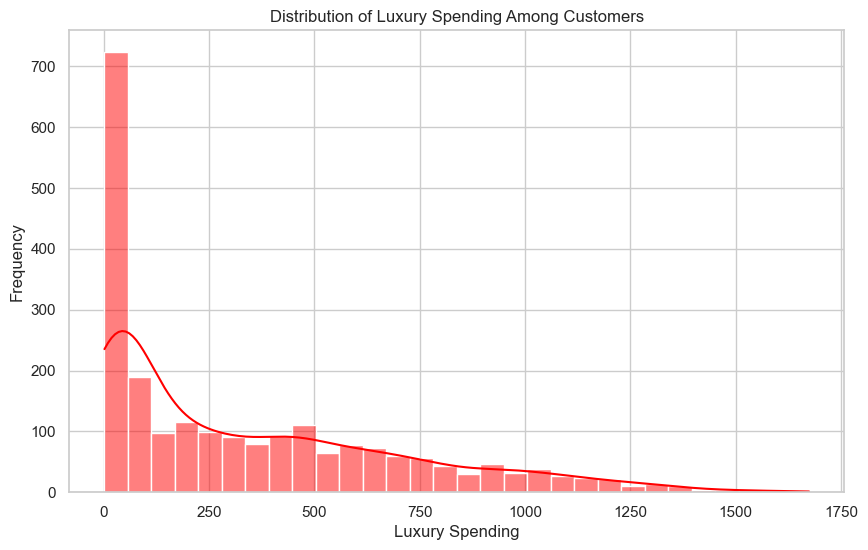

In [121]:
# Univariate Analysis: Distribution of Luxury Spending
plt.figure(figsize=(10, 6))
sns.histplot(customer_df['Luxury_Spending'], bins=30, kde=True,color='red')
plt.title('Distribution of Luxury Spending Among Customers')
plt.xlabel('Luxury Spending')
plt.ylabel('Frequency')
plt.show()


* **More Customers Spent Less on Luxury Products**: The distribution appears to be right-skewed, meaning there are more customers who spend lower amounts on luxury items compared to those who spend higher amounts.The graph shows that the majority of customers (highest frequency) have a luxury spending range between 0 and 250 dollars
* **High Spent on Luxury Products**: As the luxury spending amount increases, the number of customers in each spending range decreases dramatically, indicating that very few customers spend large amounts on luxury items.

## 5.2) Bivariate Analysis

#### 5.21) Analysis of Income Spent by Living Arrangement (Numerical vs. Numerical)

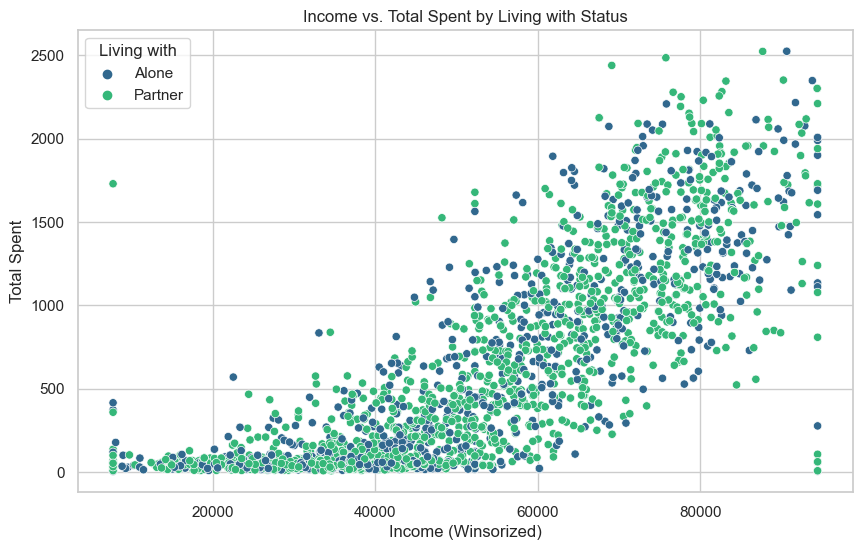

In [122]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income_winsorized', y='Total_Spent', hue='Living_with', data=customer_df, palette='viridis')
plt.title('Income vs. Total Spent by Living with Status')
plt.xlabel('Income (Winsorized)')
plt.ylabel('Total Spent')
plt.legend(title='Living with')
plt.show()

* **Income Correlation with Spending**: The positive trend indicates that higher-income individuals generally spend more, reflecting a common pattern where increased financial capacity leads to higher expenditures.


* **Impact of Living Arrangements**: The overlap in data points for "Alone" and "Partner" categories suggests that while income drives spending, living arrangements have a less impact on this relationship.

#### 5.22) The Impact of Age on Spending Behavior  (Numerical vs. Numerical)

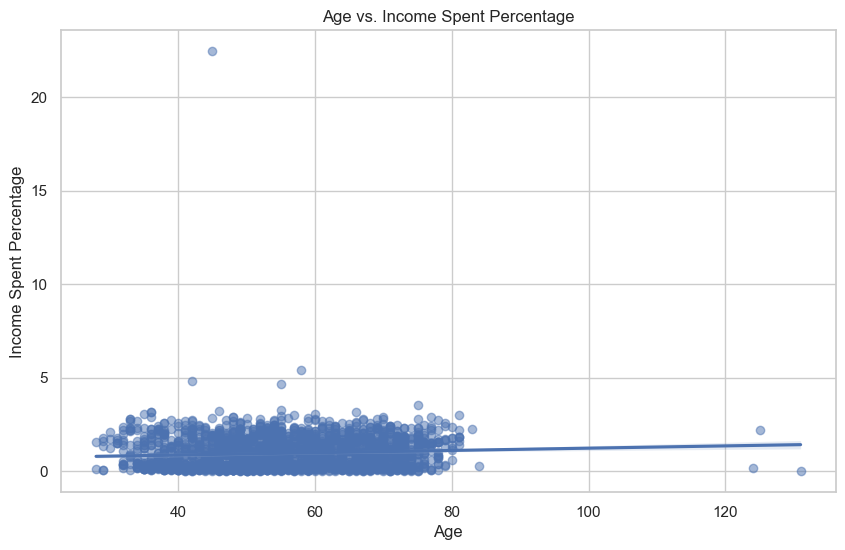

In [123]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Income_Spent_Percentage', data=customer_df, scatter_kws={'alpha':0.5})
plt.title('Age vs. Income Spent Percentage')
plt.xlabel('Age')
plt.ylabel('Income Spent Percentage')
plt.show()


* **Weak Positive Correlation with Age**: There is a slight upward trend suggesting that older individuals may spend a marginally higher percentage of their income, but the relationship is weak and highly variable.

* **High Variability and Concentration**: Most data points are clustered between 0-5% of income spent, with considerable scatter and a few notable outliers, particularly among younger individuals.

#### 5.23) The Impact of Money spent by Education (Categorical vs. Numerical)

In [124]:
customer_df.Education = customer_df.Education.replace(
    {
        "Basic": "Undergraduate",
        "2n Cycle": "Undergraduate",
        "Graduation": "Graduate",
        "Master": "Postgraduate",
        "PhD": "Postgraduate",
    }
)

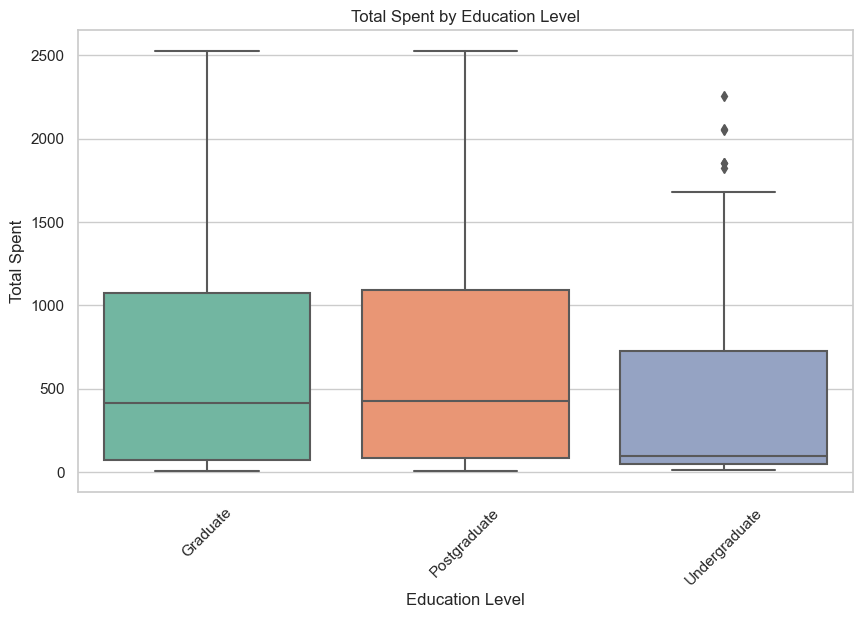

In [125]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Total_Spent', data=customer_df, palette='Set2')
plt.title('Total Spent by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.show()


* **Influence of Education Level**: Education level moderately impacts spending patterns, with Graduate and Postgraduate individuals typically spending more than Undergraduates.

* **Overlap and Variability**: All education levels have potential for high spenders, especially pronounced among Undergraduates. The right-skewed distributions and overlap across education levels suggest that other factors, such as income or personal financial habits, also significantly influence spending behavior. Higher education does not guarantee higher spending, and lower education does not preclude high spending.

#### 5.24) Response Recieved by Living with Category (Categorical vs. Categorical)

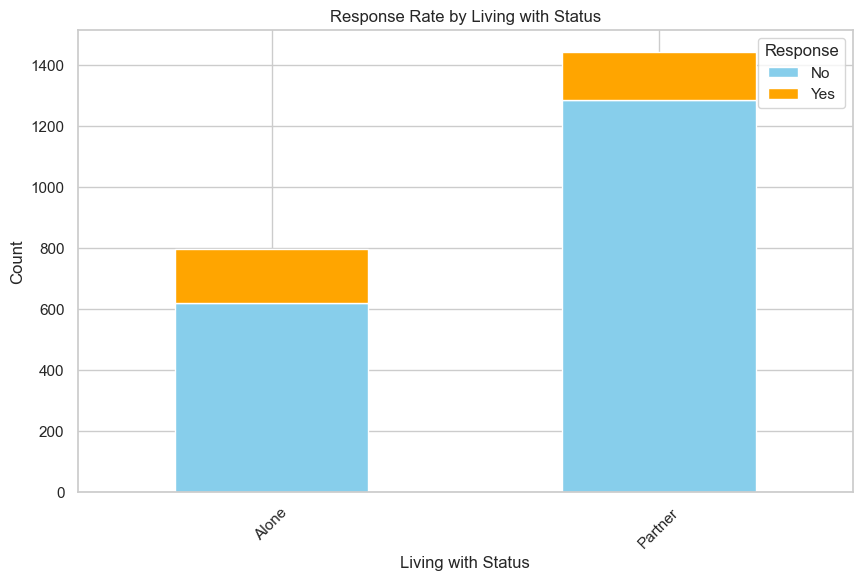

In [126]:
response_counts = customer_df.groupby(['Living_with', 'Response']).size().unstack()

response_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Response Rate by Living with Status')
plt.xlabel('Living with Status')
plt.ylabel('Count')
plt.legend(title='Response', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()


* **Response Rate**: Individuals living alone have a higher proportion of "Yes" responses, indicating they may be more likely to respond positively to the offer or survey is being measured.









#### 5.25) How Total Spending Relates to Customer Tenure (Numerical vs. Numerical)








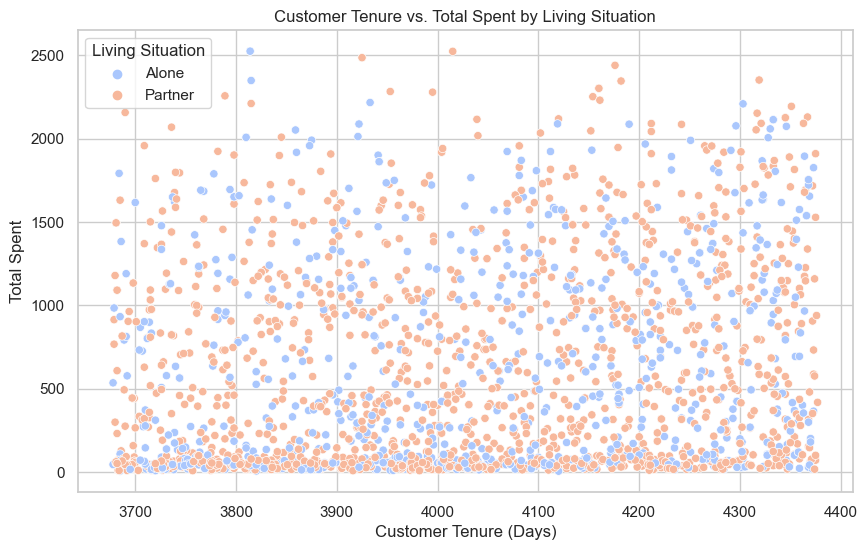

In [127]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customer_Tenure', y='Total_Spent', hue='Living_with', data=customer_df, palette='coolwarm')
plt.title('Customer Tenure vs. Total Spent by Living Situation')
plt.xlabel('Customer Tenure (Days)')
plt.ylabel('Total Spent')
plt.legend(title='Living Situation')
plt.show()


* **Lack of Strong Correlation**: The even scatter indicates that total spending does not strongly correlate with customer tenure, suggesting tenure alone is not a strong predictor of spending.

* **Influence of Other Factors**: Since no clear pattern is observed, other factors like income or promotions might be more influential in determining total spending.

#### 5.26) How Total Spending Relates to Income?  (Numerical vs. Numerical)


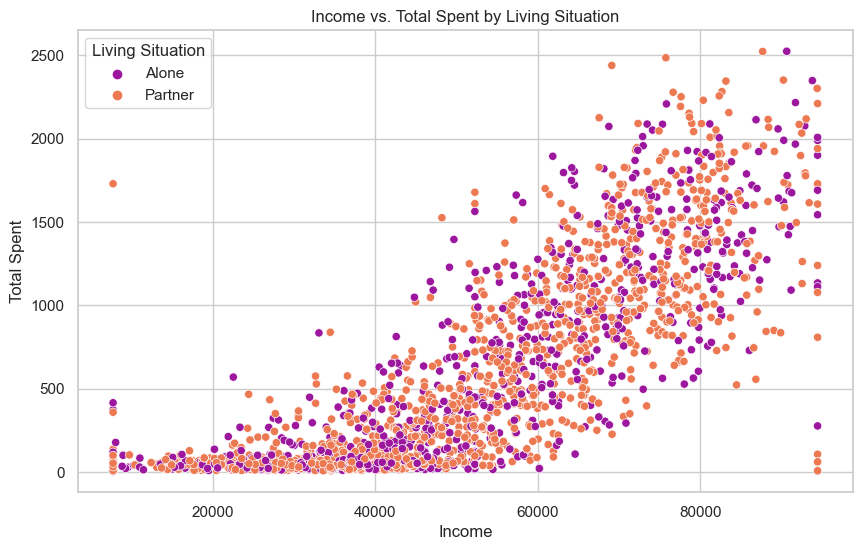

In [128]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income_winsorized', y='Total_Spent', hue='Living_with', data=customer_df, palette='plasma')
plt.title('Income vs. Total Spent by Living Situation')
plt.xlabel('Income')
plt.ylabel('Total Spent')
plt.legend(title='Living Situation')
plt.show()


* **Positive Correlation**: There is a clear positive correlation between income and total spending, where higher income leads to higher spending.

* **Living Situation Impact**: Both individuals living alone and with a partner show similar spending patterns relative to income.

#### 5.27) Customer Lifetime Value (CLV) vs. Campaign Response




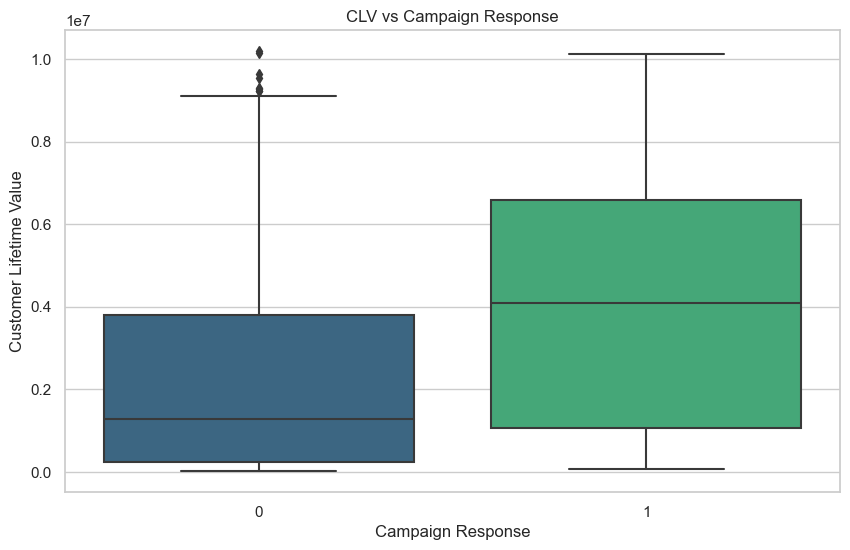

In [129]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='CLV', data=customer_df, palette='viridis')
plt.title('CLV vs Campaign Response')
plt.xlabel('Campaign Response')
plt.ylabel('Customer Lifetime Value')
plt.show()

* **Higher CLV Customers Show Greater Campaign Response**: Customers who respond to marketing campaigns tend to have a higher lifetime value compared to those who do not respond. This suggests that targeting higher CLV customers could lead to more successful campaign outcomes.


#### 5.28) Luxury Spending vs Campaign Response


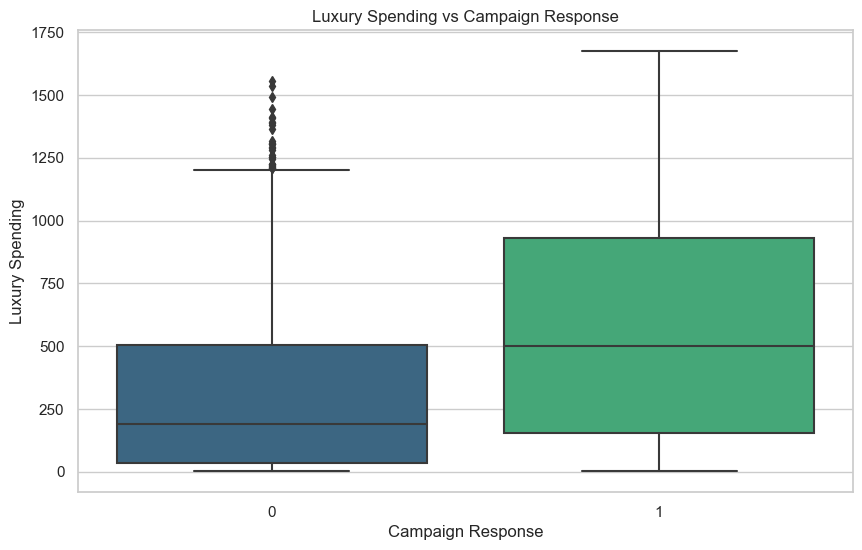

In [130]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Luxury_Spending', data=customer_df, palette='viridis')
plt.title('Luxury Spending vs Campaign Response')
plt.xlabel('Campaign Response')
plt.ylabel('Luxury Spending')
plt.show()

* **Campaign Effectiveness**: For the customers who did respond to the campaign (Campaign Response = 1), the luxury spending is significantly higher.

* **Inference**: The graph suggests that there is a positive correlation between luxury spending and campaign response. Customers who spend more on luxury items are more likely to respond to the campaign.

#### 5.29) Segment vs Campaign Response


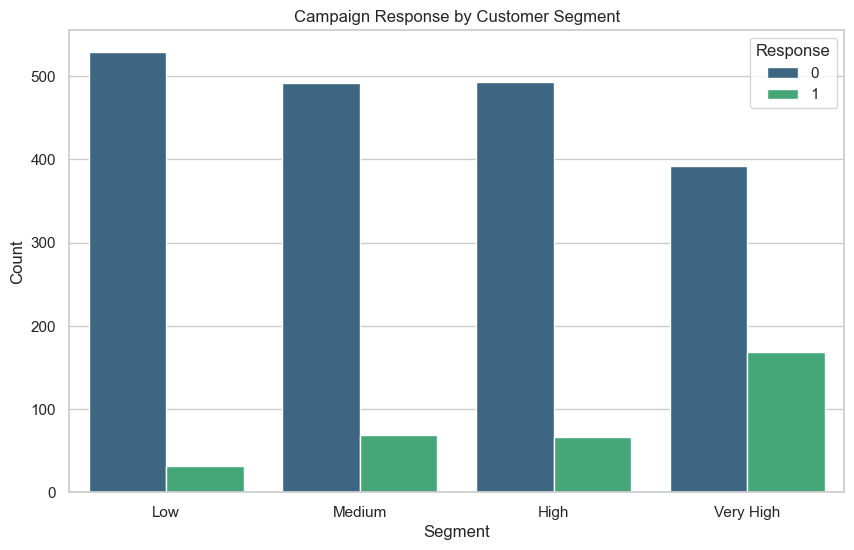

In [131]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Segment', hue='Response', data=customer_df, palette='viridis')
plt.title('Campaign Response by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

* **Campaign Effectiveness among Segments**: This suggests that the "Very High" segment, which likely represents the most valuable or engaged customers, is the most responsive to the campaign compared to the other customer segments.



#### 5.30) Total Response vs Campaign Response


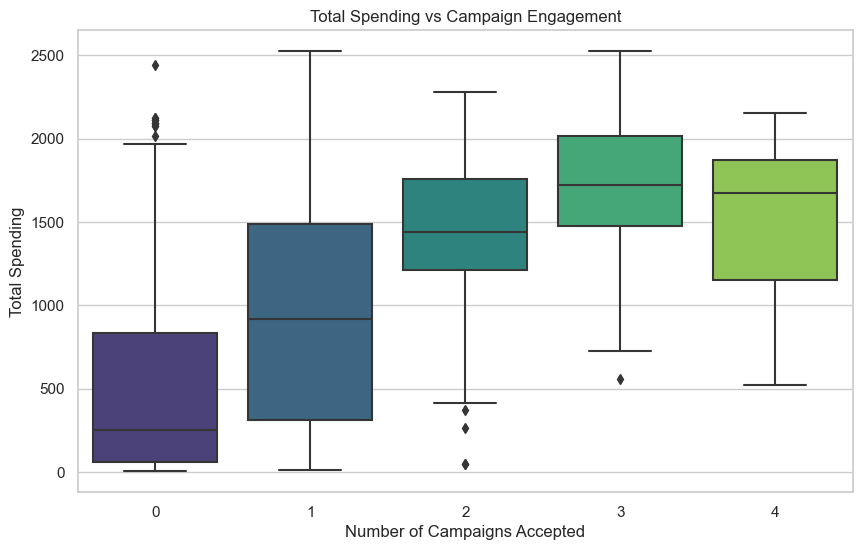

In [132]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Campaign_Engagement', y='Total_Spent', data=customer_df, palette='viridis')
plt.title('Total Spending vs Campaign Engagement')
plt.xlabel('Number of Campaigns Accepted')
plt.ylabel('Total Spending')
plt.show()

* **Positive Correlation between Campaigns Accepted and Total Spending**: There is a general positive trend between the number of campaigns accepted by customers and their total spending levels.Customers who have accepted more campaigns (3 or 4) tend to have higher total spending.

* **Value of Targeting Responsive Customers**:The data suggests that customers who are more engaged with the company's marketing campaigns (by accepting more of them) are likely to generate higher total spending.


#### 5.27) Correlation Matrix

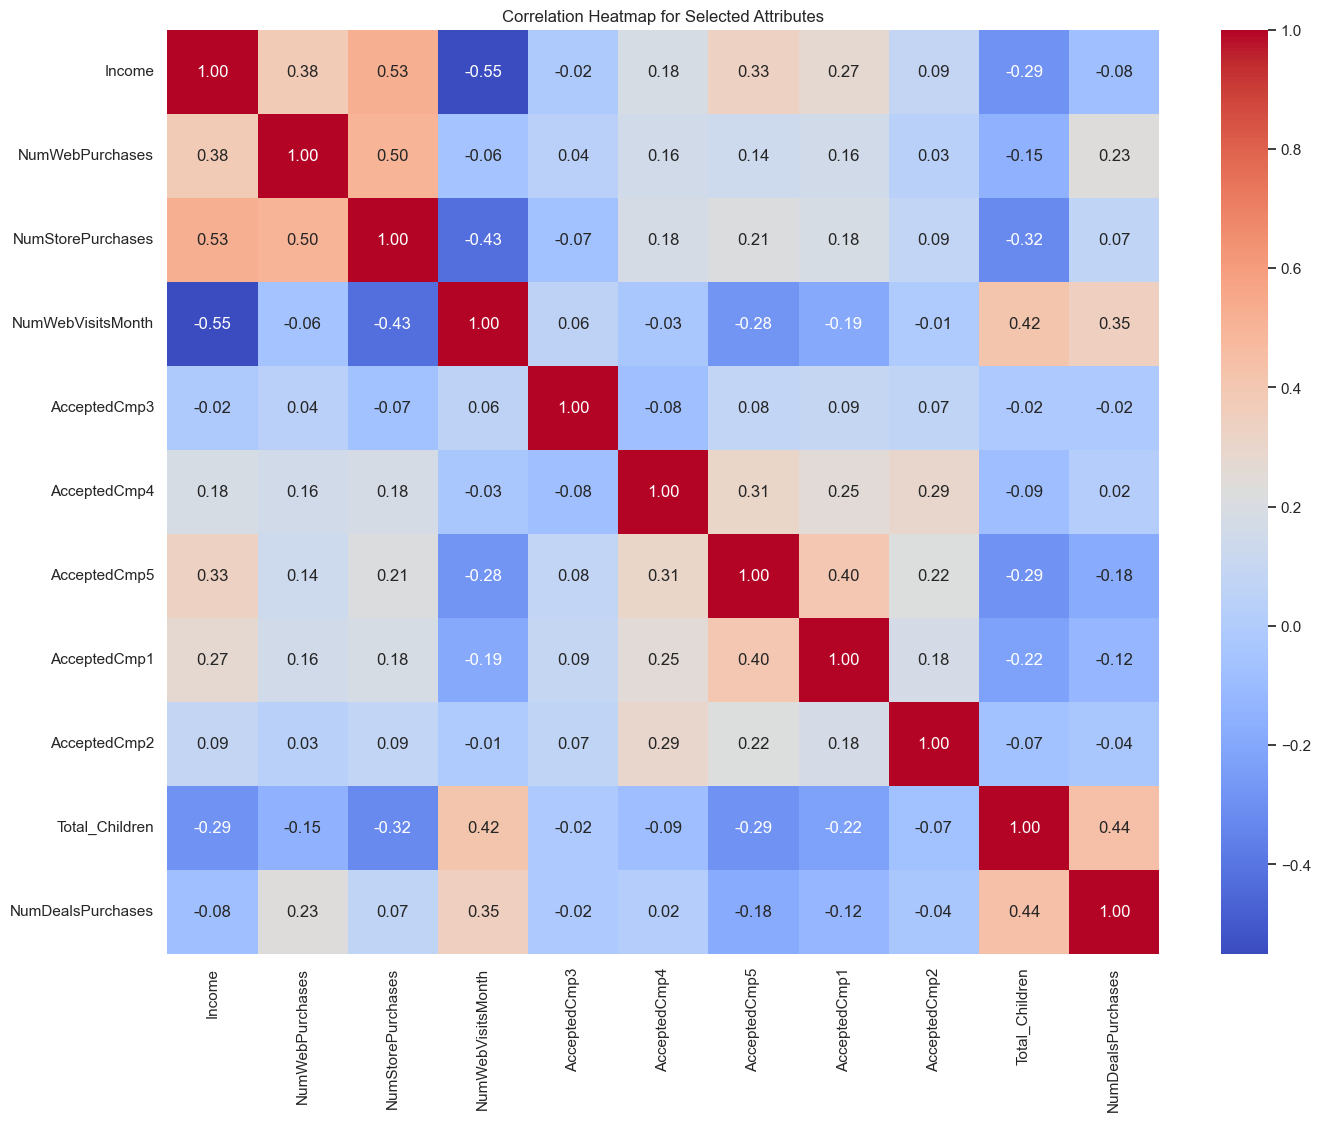

In [133]:
columns_of_interest = ['Income',  'NumWebPurchases', 'NumStorePurchases', 
                       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 
                       'AcceptedCmp2','Total_Children','NumDealsPurchases']

customer_df_selected = customer_df[columns_of_interest]

# Calculating the correlation matrix
corr = customer_df_selected.corr()

# Creating the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Selected Attributes')
plt.show()

 **Income**
 * Income has a positive correlation with almost each product category, indicating that customers with higher incomes tend to buy more items.

* Income is strongly negatively correlated with the number of web visits per month.

* Customers with higher incomes are more likely to accept campaigns.

* Income and family size are negatively correlated, indicating that customers with higher incomes tend to have fewer or no children.

**Web Visits**

 * The monthly web visit count shows a strong negative correlation with expenditure on various product types. This suggests that customers often purchase these products through alternate channels such as offline shops



**Total Children**

* Total Children and the number of web visits per month are strongly positively correlated. This indicates that customers who have more kids at home tend to make more web visits in a month.

* Family Size and the number of deals purchases are moderately positively correlated. This may indicate that customers who have more teenagers at home tend to search for discounts in its purchases.


**Campaings**

 * Campaigns 1 and 5 yielded the most positive returns, indicating that customers havespent more during these campaigns.

# 6) Conclusion

* The most valuable customers are those with higher incomes, thus the business should focus on them to get higher revenue.
* Online Web Puchase is most likely done by teengers looking for discounts, so a targeted advertisement can be run to increase the web purchases.
* Every few responses are recieved from both living with single and partner,this may suggest a tailored personalised based recommendation system is not upto the mark.
* Most customers are between 40 and 60 years old, but a few are over 100 years old and it may be old record
* Customers with higher income has less or no children which may be due to career focus or education and lifestyle.
* A low Customer lifetime Value indicates that the business has a large customer base, but many customers do not spend much or do not have a long tenure.
* The Insights drawn from Spending Categories could be useful for the company's marketing and pricing strategies targeting different segments of luxury consumers.
* The graph provides insights into the effectiveness of the campaign across different customer segments, which can inform future targeting and segmentation strategies.
* Higher Spenders More Responsive to Campaigns, thus future marketing efforts on their most valuable, high-spending customers.
* Theres a direct Positive Correlation between Campaigns Accepted and Total Spending, thus in future Campaign based marketing can be effective.





# 7) Future Works

 Implement Clustering: Apply clustering algorithms to create customer segmentsto Identifying distinct customer groups for targeted marketing strategies.

Profile Segments: Define and analyze the characteristics of each segment's attributes to tailor marketing strategies and product offerings effectively.

Performance Evaluation: Evaluate the effectiveness of the segmentation by comparing it with business outcomes such as marketing campaign success or customer satisfaction. This will help in assessing the impact of the segmentation on achieving business goals.








# 8) References

1) https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data
2) https://www.w3schools.com/python/python_ml_scatterplot.asp
3) https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/
